In [25]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.signal import convolve2d
from skimage import io

In [26]:
IMAGE_URL = "https://upload.wikimedia.org/wikipedia/commons/6/61/De_nieuwe_vleugel_van_het_Stedelijk_Museum_Amsterdam.jpg"
image = io.imread(IMAGE_URL)

In [27]:
Y, X = np.meshgrid(np.linspace(-3, 3, 31), np.linspace(-3, 3, 31))
kernel_r = np.exp(-(X**2 + Y**2) / 0.5)
kernel_g = np.exp(-(X**2 + Y**2) / 5)
kernel_b = np.exp(-(X**2 + Y**2) / 50)
kernels = [kernel_r / np.sum(kernel_r), kernel_g / np.sum(kernel_g), kernel_b / np.sum(kernel_b)]

In [28]:
image_3d = np.zeros_like(image)
for ch in range(image.shape[2]):
    image_3d[:, :, ch] = convolve2d(image[:, :, ch], kernels[ch], mode="same")

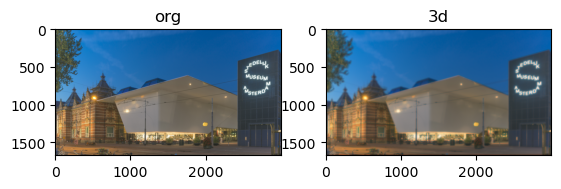

In [29]:
fig, ax = plt.subplots(1, 2)
ax[0].set_title("org")
ax[0].imshow(image)
ax[1].set_title("3d")
ax[1].imshow(image_3d)
plt.show()